<a href="https://colab.research.google.com/github/mehmet-can-duru/NLP_Basic/blob/master/NLP_Denem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install TurkishStemmer

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer
from TurkishStemmer import TurkishStemmer#"pip install TurkishStemmer"
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, LSTM
from keras import preprocessing, layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [ ]:
nltk.download('stopwords')#stepwords yüklüyorum
#error_bad_lines=False bunu yazmadığım takdirde hata aldım verinin içindeki virgüllerden dolayı
yorumlar = pd.read_csv('./DuzenlenmisVeriCsv3.csv', encoding = 'cp1254', error_bad_lines=False)#Veriyi Yüklüyorum
stopWordList = nltk.corpus.stopwords.words('turkish')#türkçe metinim olduğu için türkçe stepwords yüklüyorum
#ps = PorterStemmer()
stemmer = TurkishStemmer()#Bağlaçları ayırma yüklüyorum 
#print(stopWordList)

print(len(yorumlar))
"""
Ön Temizleme veya İşleme (Preprocessing)
"""
duzenlen = []
#labels = []
for i in range(len(yorumlar)):
    yorum = re.sub('[^a-zA-ZÇŞĞÜÖİçşğüöı]', ' ', yorumlar['Veriler'][i])#[^a-zA-ZÇŞĞÜÖİçşğüöı] bunlar dışında olan karakterleri filitreleme
    yorum = yorum.lower()#küçük harfe çevirme
    yorum = yorum.split()#parçalara ayırma(token)
    yorum = [stemmer.stem(kelime) for kelime in yorum if not kelime in set(stopWordList)]#stopwordleri atıklıyor ve bağlaçları atıyor
    yorum = ' '.join(yorum) #tekrardan cümleyi birleştiriyorum
    duzenlen.append(yorum)#Düzenlenen cümleleri yeni diziye kaydediyorum
    #label = re.sub('[^0-1]','',str(yorumlar['Degerler'][i])).values
    #labels.append(label)

In [ ]:

Max_Num_Words = 40000
tokenizer = Tokenizer(num_words=Max_Num_Words)
tokenizer.fit_on_texts(duzenlen)
sequences = tokenizer.texts_to_sequences(duzenlen)






maxlen=35
X = pad_sequences(sequences, maxlen=maxlen)
y = yorumlar.iloc[:,1].values
#print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

print(len(X_train))
print(X_train.shape)

19531
(19531, 35)


In [ ]:
model = Sequential()

model.add(layers.Embedding(40000, 128, input_length=maxlen))
#model.add(Flatten())
#model.add(LSTM(32))
model.add(Dense(32))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])


history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 35, 128)           5120000   
_________________________________________________________________
dense_1 (Dense)              (None, 35, 32)            4128      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 31, 32)            5152      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 6, 32)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2, 32)             5152      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15624 samples, validate on 3907 samples
Epoch 1/10
15624/15624 [==============================] - 7s 478us/step - loss: 1.4018 - acc: 0.8082 - val_loss: 0.5063 - val_acc: 0.7963
Epoch 2/10
15624/15624 [==============================] - 1s 87us/step - loss: 0.4767 - acc: 0.8082 - val_loss: 0.4936 - val_acc: 0.7963
Epoch 3/10
15624/15624 [==============================] - 1s 87us/step - loss: 0.4635 - acc: 0.8082 - val_loss: 0.4900 - val_acc: 0.7963
Epoch 4/10
15624/15624 [==============================] - 1s 85us/step - loss: 0.4509 - acc: 0.8082 - val_loss: 0.4850 - val_acc: 0.7963
Epoch 5/10
15624/15624 [==============================] - 1s 85us/step - loss: 0.4325 - acc: 0.8083 - val_loss: 0.4832 - val_acc: 0.7963
Epoch 6/10
15624/15624 [==============================] - 1s 85us/step - loss: 0.4025 - acc: 0.8104 - val_loss: 0.4575 - val_acc: 0.8001
Epoch 7/10
15624/15624 [==============================] - 1s 84us/step - loss: 0.3603 - acc: 0.8270 - val_loss: 0.4882 - val_acc

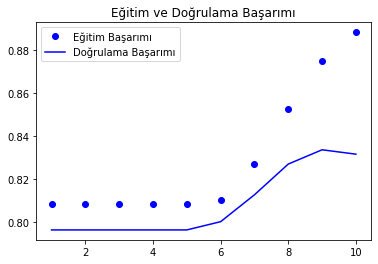

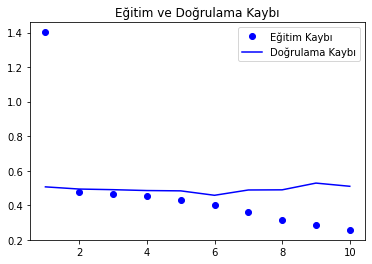

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Eğitim Başarımı')
plt.plot(epochs, val_acc, 'b', label='Doğrulama Başarımı')
plt.title('Eğitim ve Doğrulama Başarımı')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Eğitim Kaybı')
plt.plot(epochs, val_loss, 'b', label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.legend()

plt.show()

In [ ]:
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)

# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

Accuracy: 0.839238
Precision: 0.645621
Recall: 0.341595
F1 score: 0.446794
